# Heart Disease Predictor

## Problem Definition:
- Classification task 
- Trying to predict whether a person has a heart disease or not based on his medical and personal record
- Dataset used: https://www.kaggle.com/datasets/endofnight17j03/heart-failure-prediction-dataset

## Setup

Import libraries to be used

In [455]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Deep learning 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Read the Dataset

In [ ]:
dataset = pd.read_csv("dataset.csv") # read the dataset

---

## Exploratory Data Analysis (EDA)

### Data & Statistics

In [457]:
# Display the first 12 rows
print("First 12 rows:")
dataset.head(12) 

First 12 rows:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [458]:
# Display the last 12 rows
print("Last 12 rows:")
dataset.tail(12)

Last 12 rows:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
906,55,F,ATA,132,342,0,Normal,166,N,1.2,Up,0
907,44,M,ASY,120,169,0,Normal,144,Y,2.8,Down,1
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


In [459]:
# Get the number of rows and columns
num_rows, num_columns = dataset.shape
print(f"The dataset contains {num_rows} rows and {num_columns} columns.")


The dataset contains 918 rows and 12 columns.


In [460]:
# List column names and data types
print("Column names and data types:")
print(dataset.dtypes)

Column names and data types:
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [461]:
# Get the name of the first column
first_column_name = dataset.columns[0]
print(f"The first column is: {first_column_name}")


The first column is: Age


In [462]:
# Generate a summary of the dataset
print("Dataset summary:")
dataset.info()

Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [463]:
# Generate a summary of the dataset attributes
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [464]:
# get all categorical attributes
categorical_cols = dataset.select_dtypes(include=['object', 'category'])
for col in categorical_cols:
    print(col)

Sex
ChestPainType
RestingECG
ExerciseAngina
ST_Slope


In [465]:
# find unique values for all categorical attributes
for col in categorical_cols:
    print(f"Unique values in {col}: {categorical_cols[col].unique()}")

Unique values in Sex: ['M' 'F']
Unique values in ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
Unique values in RestingECG: ['Normal' 'ST' 'LVH']
Unique values in ExerciseAngina: ['N' 'Y']
Unique values in ST_Slope: ['Up' 'Flat' 'Down']


In [466]:
# find the most frequent value (mode) for all attributes
for col in dataset.columns:
    print(f"\nMode: {dataset[col].mode()}")
print(dataset['ChestPainType'].mode())


Mode: 0    54
Name: Age, dtype: int64

Mode: 0    M
Name: Sex, dtype: object

Mode: 0    ASY
Name: ChestPainType, dtype: object

Mode: 0    120
Name: RestingBP, dtype: int64

Mode: 0    0
Name: Cholesterol, dtype: int64

Mode: 0    0
Name: FastingBS, dtype: int64

Mode: 0    Normal
Name: RestingECG, dtype: object

Mode: 0    150
Name: MaxHR, dtype: int64

Mode: 0    N
Name: ExerciseAngina, dtype: object

Mode: 0    0.0
Name: Oldpeak, dtype: float64

Mode: 0    Flat
Name: ST_Slope, dtype: object

Mode: 0    1
Name: HeartDisease, dtype: int64
0    ASY
Name: ChestPainType, dtype: object


In [467]:
# find rows with high Cholesterol (> 500)
dataset[dataset.Cholesterol > 500]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [468]:
# print rows who have chest pain type that starts with N (NAP)
NAP = dataset[dataset.ChestPainType.str.startswith('N')]
# get the number of rows that staisfy this condition
row_count = NAP.shape[0]

print(NAP)
print(f"Number of rows: {row_count}")

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
1     49   F           NAP        160          180          0     Normal   
4     54   M           NAP        150          195          0     Normal   
5     39   M           NAP        120          339          0     Normal   
10    37   F           NAP        130          211          0     Normal   
14    42   F           NAP        115          211          0         ST   
..   ...  ..           ...        ...          ...        ...        ...   
891   66   F           NAP        146          278          0        LVH   
892   39   F           NAP        138          220          0     Normal   
896   47   M           NAP        130          253          0     Normal   
905   67   M           NAP        152          212          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
1      156              N  

In [469]:
# group data by Sex and Chest Pain Type and analyze results of specific attributes
grouped_df = dataset.groupby(['Sex', 'ChestPainType']).agg({'Age': ['count', 'mean', 'min', 'max'],
                                                            'Cholesterol': ['mean', 'std'],
                                                            'RestingBP': ['mean', 'std'],
                                                            'MaxHR': ['min', 'max', 'mean', 'std']}).reset_index()

grouped_df

Sex ChestPainType   Age                    Cholesterol              \
                    count       mean min max        mean         std   
0   F           ASY    70  54.257143  33  71  235.200000  103.252975   
1   F           ATA    60  49.583333  31  74  249.350000   68.216710   
2   F           NAP    53  53.132075  37  76  245.603774   76.206284   
3   F            TA    10  54.200000  30  69  210.900000   84.793147   
4   M           ASY   426  55.075117  31  77  178.666667  123.163160   
5   M           ATA   113  49.061947  28  74  224.389381   68.546964   
6   M           NAP   150  53.373333  33  76  180.420000  107.158621   
7   M            TA    36  55.000000  32  74  206.000000   84.172951   

    RestingBP            MaxHR                              
         mean        std   min  max        mean        std  
0  136.242857  22.939388    90  184  139.128571  22.070980  
1  128.650000  16.447992   110  192  152.366667  19.208020  
2  129.264151  15.880747    96  180  148.528302  22.159044  
3  141.000000  20.248457    98  185  145.200000  28.381528  
4  132.734742  17.746650    60  186  126.727700  23.269188  
5  131.672566  17.056337    93  202  149.061947  23.753302  
6  131.560000  20.530704    70  194  141.366667  26.537151  
7  135.138889  18.813601   100  190  148.638889  21.860797

In [470]:
# print the row corresponding to the max Cholesterol

# get the row corresponding to the highest choleterol
max_cholesterol = dataset.loc[dataset['Cholesterol'].idxmax()]
print(max_cholesterol)

Age                   54
Sex                    M
ChestPainType        ASY
RestingBP            130
Cholesterol          603
FastingBS              1
RestingECG        Normal
MaxHR                125
ExerciseAngina         Y
Oldpeak              1.0
ST_Slope            Flat
HeartDisease           1
Name: 149, dtype: object


### Data Visualization

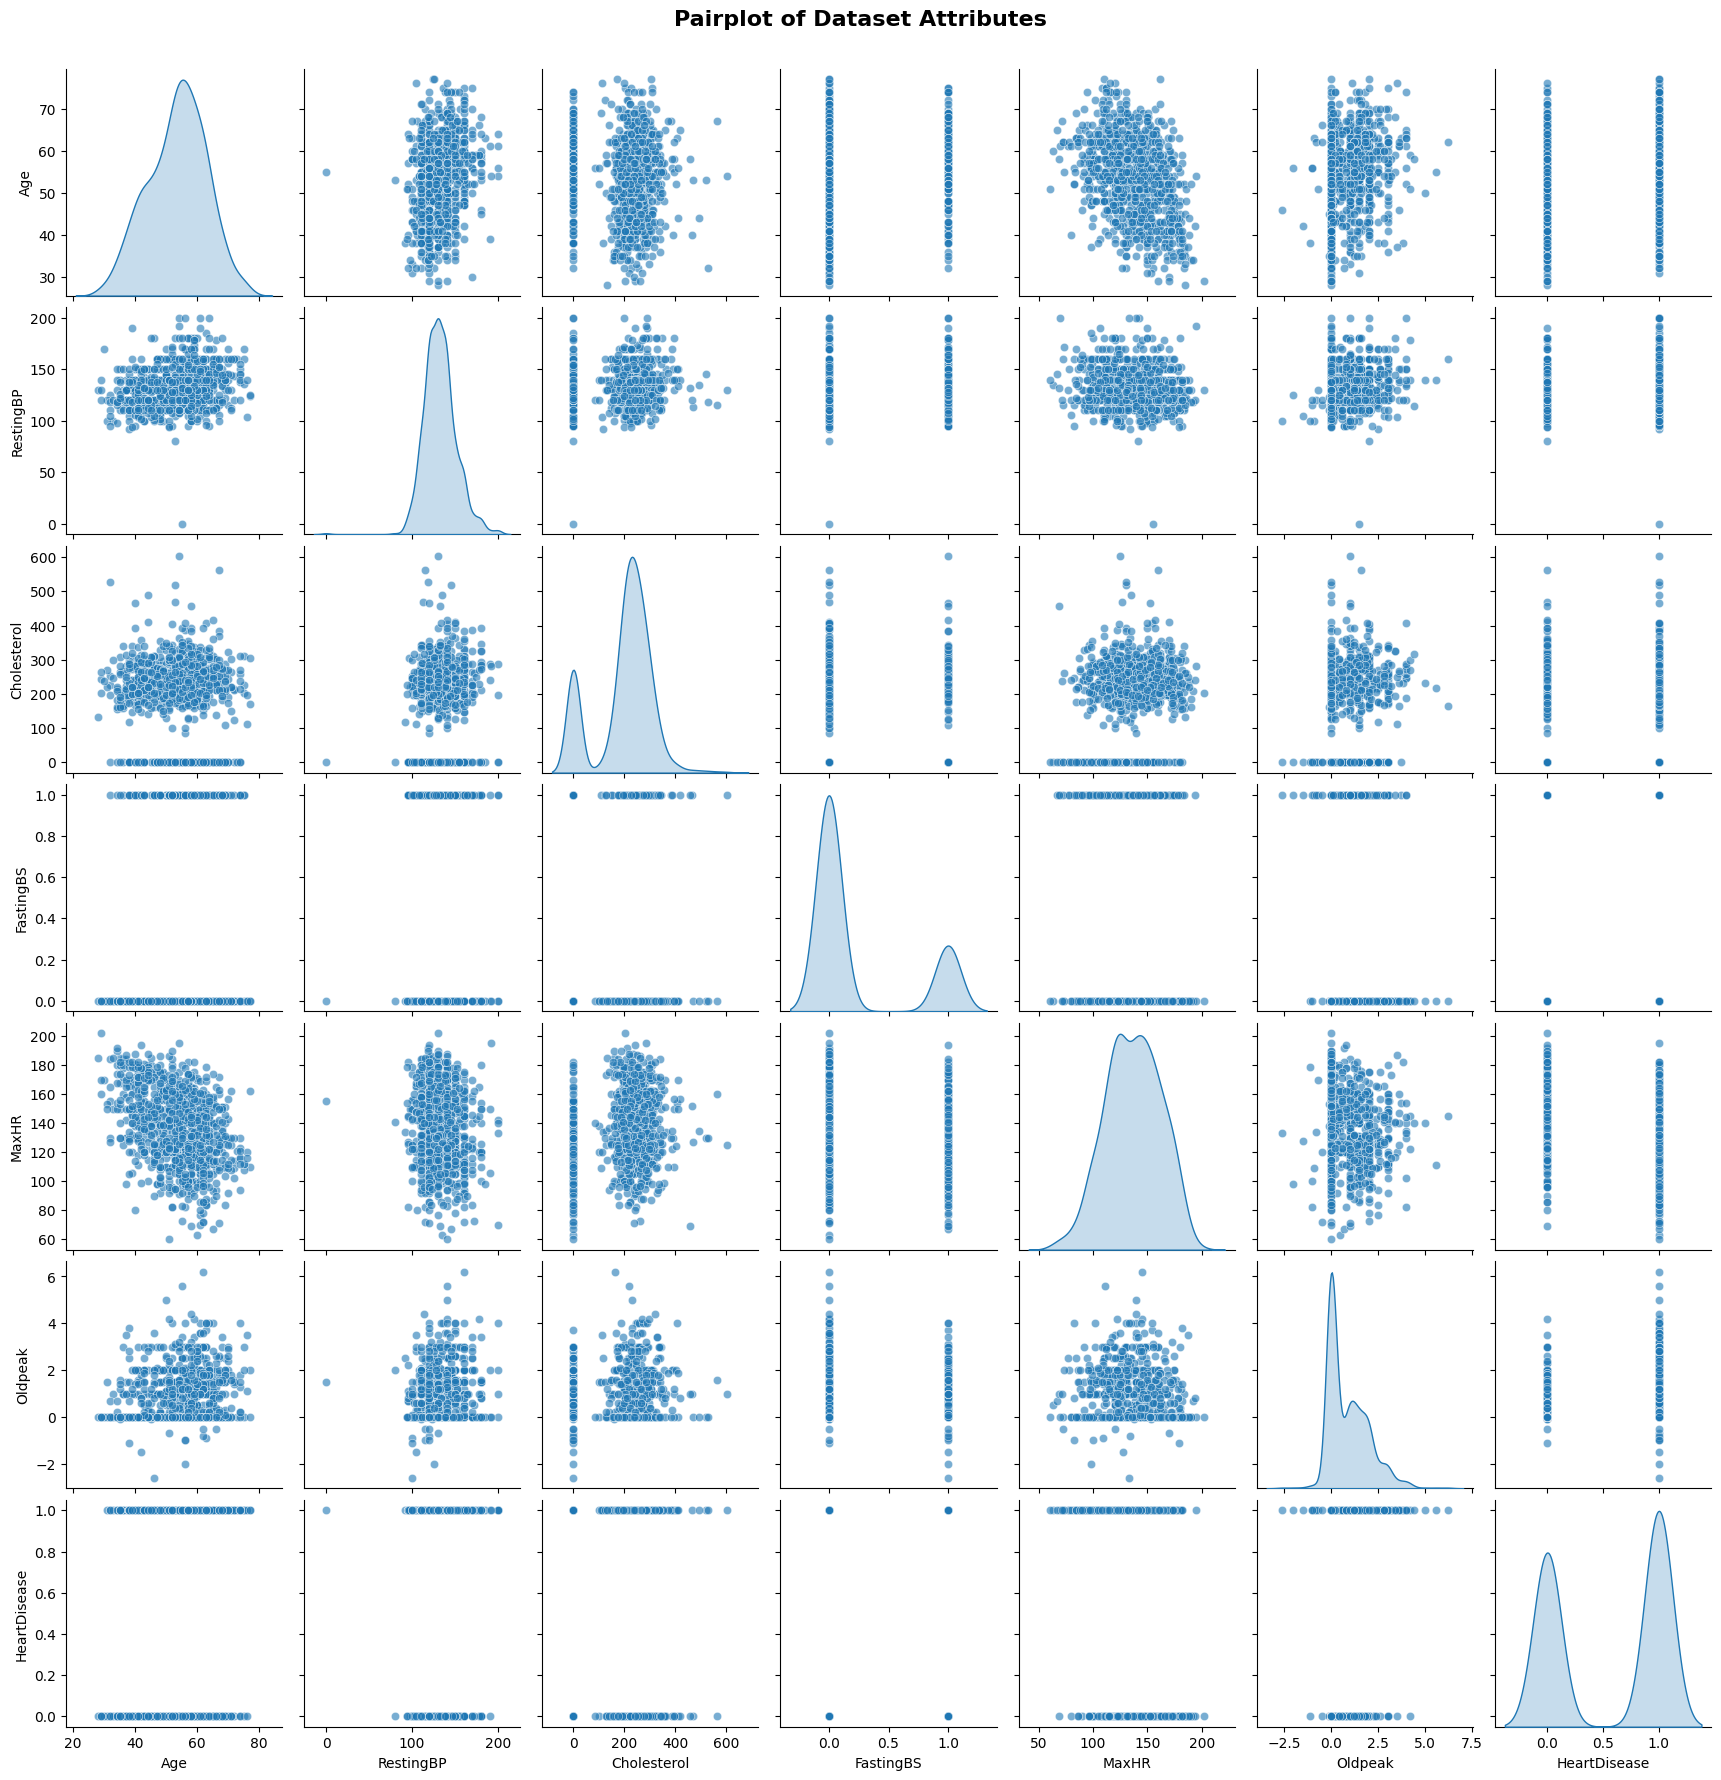

In [471]:
# visualize the entire dataset using a pairplot
sns.pairplot(dataset, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot of Dataset Attributes", y=1.02, fontsize=16, fontweight='bold')
plt.show()

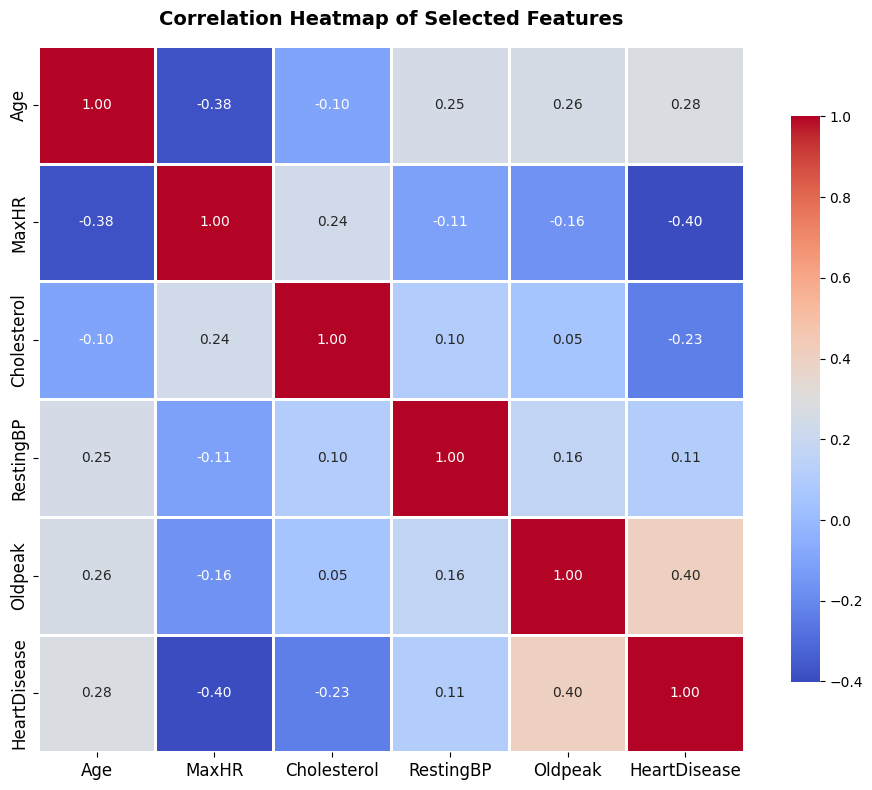

In [472]:
# construct a heatmap

# calculate the correlation matrix for selected numerical features
selected_features = ['Age', 'MaxHR', 'Cholesterol', 'RestingBP', 'Oldpeak', 'HeartDisease']
corr_matrix = dataset[selected_features].corr()

# create the heatmap
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=1, cbar_kws={'shrink': 0.8}, square=True)

plt.title("Correlation Heatmap of Selected Features", fontsize=14, fontweight='bold', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  

plt.show()

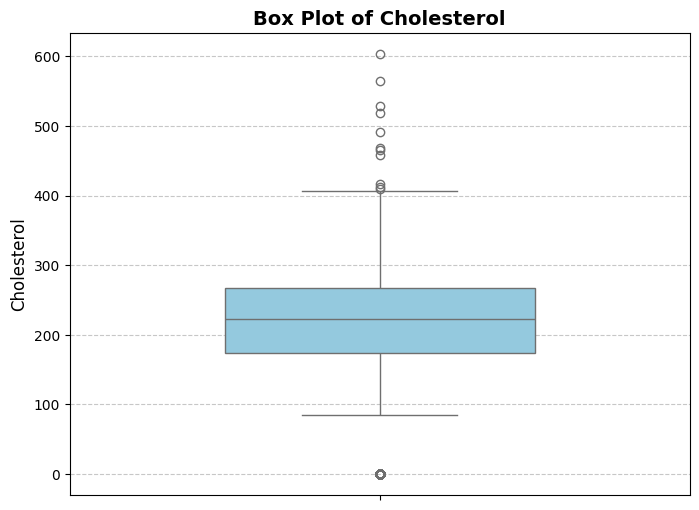

In [473]:
# construct boxplot for Cholesterol

# justification: showing cholesterol using a boxplot will show the average cholesterol measures
#                and will also show the outliers indicating people with abnormal levels

#box plot for cholesterol column
plt.figure(figsize=(8, 6))  
sns.boxplot(y=dataset['Cholesterol'], color='skyblue', width=0.5)  # Use seaborn for a more appealing boxplot

plt.ylabel('Cholesterol', fontsize=12) 
plt.title('Box Plot of Cholesterol', fontsize=14, fontweight='bold')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  # add grid

plt.show()

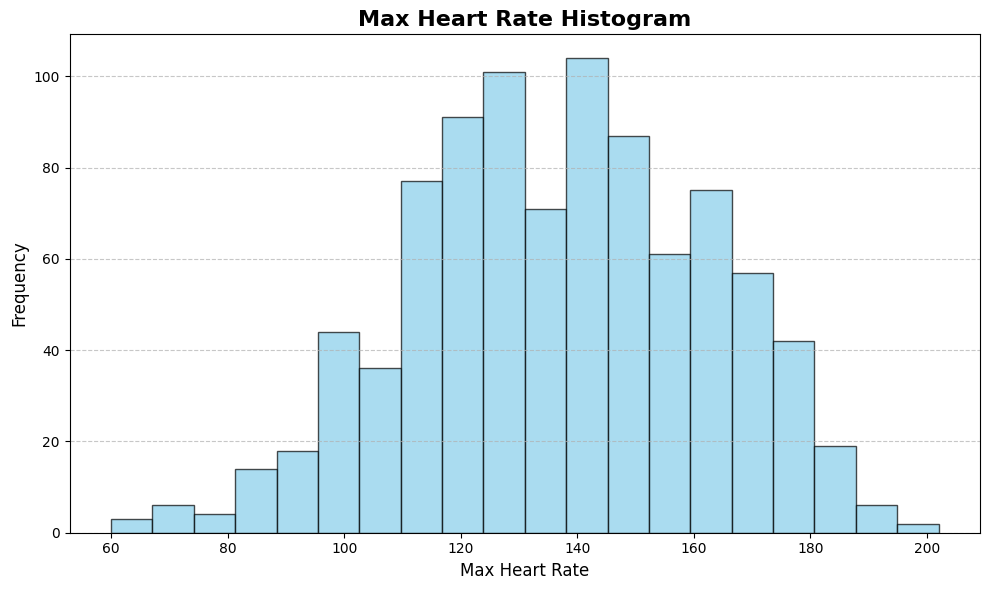

In [474]:
# generate a histogram for the Max Heart Rate

# relevance: using the Max Heart Rate attribute to represent in a histogram 
#            will help us to know the distribution of the heart rates: skewed, symmetric, etc

# draw a histogram for the max heart rate attribute
plt.figure(figsize=(10, 6))  
plt.hist(dataset["MaxHR"], bins=20, color='skyblue', edgecolor='black', alpha=0.7) 

plt.title("Max Heart Rate Histogram", fontsize=16, fontweight='bold')  
plt.ylabel("Frequency", fontsize=12) 
plt.xlabel("Max Heart Rate", fontsize=12)  

plt.grid(axis='y', linestyle='--', alpha=0.7)  # add grid 
plt.tight_layout()  # adjust layout to prevent clipping

# show the histogram
plt.show()

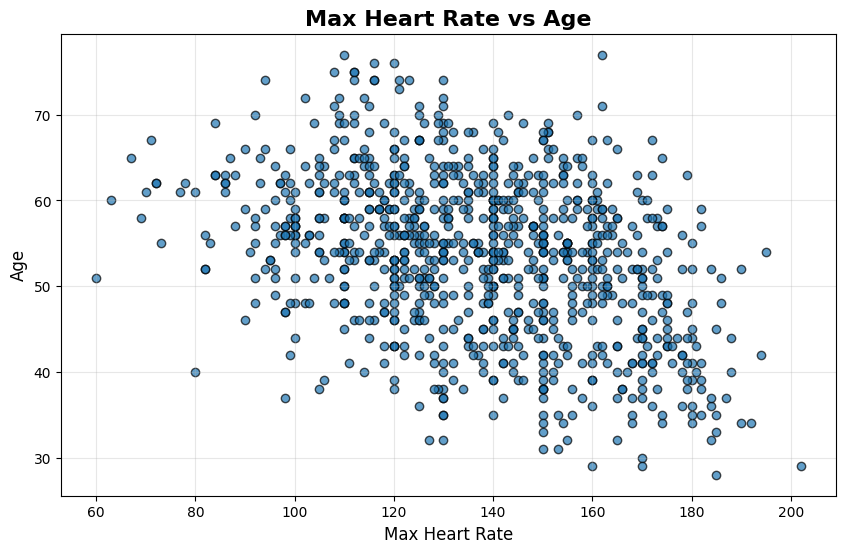

In [475]:
# create a scatterplot between age and max heart rate to observe relationship

# relationship observed: as age increases, the maximum heart rate oberved decreases. 
#                        this is a negative correlation

# scatter plot for the relationship between cholesterol and max heart rate
plt.figure(figsize=(10, 6))
plt.scatter(dataset["MaxHR"], dataset["Age"], alpha=0.7, edgecolor='k')

plt.title("Max Heart Rate vs Age", fontsize=16, fontweight='bold')
plt.xlabel("Max Heart Rate", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.grid(alpha=0.3)  # add a light grid for better readability

# show the plot
plt.show()

Frequency of ChestPainType: 
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

Frequency Percentage of ChestPainType: 
ChestPainType
ASY    54.030501
NAP    22.113290
ATA    18.845316
TA      5.010893
Name: proportion, dtype: float64


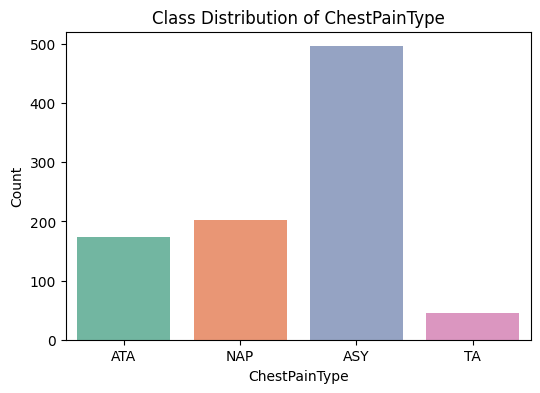

In [476]:
# find the class distribution of Chest Pain Type

# the results show that the most common chest pain type is ASY, contributing to more than 54
# percent of all individuals in the dataset and the data is imbalanced as it's skewed to the left

attribute  = 'ChestPainType' # attribute to be analyzed

# compute each class and its frequency
class_distribution = dataset[attribute].value_counts()
print(f'Frequency of {attribute}: \n{class_distribution}')

# compute each class and its frequency percentage
class_distribution_pct = dataset[attribute].value_counts(normalize=True) * 100
print(f'\nFrequency Percentage of {attribute}: \n{class_distribution_pct}')

# visualize the class distribution by a bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x=dataset[attribute], hue=dataset[attribute], palette="Set2", legend=False)

plt.title(f"Class Distribution of {attribute}")
plt.xlabel(attribute)
plt.ylabel("Count")
plt.show()

---

## Data Preparation & Preprocessing

In [477]:
# find duplicate rows and remove them

duplicate = dataset[dataset.duplicated()] # get duplicate rows
print(f"Duplicate rows: {duplicate.shape[0]}") # number of duplicate rows
dataset.drop_duplicates(inplace=True) # remove duplicates from dataset

Duplicate rows: 0


In [478]:
# get number of missing values in each attribute
missing_values = dataset.isnull().sum()
print(missing_values)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [479]:
# replace missing values if found

# replace missing numerical values with the median of all values
for col in dataset.select_dtypes(include=['number']).columns:
  # each missing value in each numerical column will be filled with the median
  dataset[col] = dataset[col].fillna(dataset[col].median())

# replace missing categorical values with the mode of all values
for col in dataset.select_dtypes(include=['object', 'category']).columns:
  # each missing value in each categorical column will be filled with the mode
  dataset[col] = dataset[col].fillna(dataset[col].mode())


In [480]:
# divide age into 5 equal bins

# divide ages into 5 equal bins
dataset['AgeBins'] = pd.cut(dataset['Age'], bins=5)

# count number of values in each bin and sort the bins
bin_counts = dataset['AgeBins'].value_counts().sort_index()

print(bin_counts)

AgeBins
(27.951, 37.8]     49
(37.8, 47.6]      190
(47.6, 57.4]      349
(57.4, 67.2]      276
(67.2, 77.0]       54
Name: count, dtype: int64


Convert categorical attributes to numerical

In [481]:
# I will use OneHotEncoder because LabelEncoder introduces artificial order (used for ordinal attributes)

categorical_cols = dataset.select_dtypes(include=['object', 'category'])
# use the get_dummies pandas method 
# drop_first=True is to avoid redundent features (e.g Gender_F instead of Gender_f and Gender_M)
dataset = pd.get_dummies(dataset, columns=categorical_cols.columns, drop_first=True)
dataset.head(7)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,"AgeBins_(37.8, 47.6]","AgeBins_(47.6, 57.4]","AgeBins_(57.4, 67.2]","AgeBins_(67.2, 77.0]"
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True,True,False,False,False
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False,False,True,False,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True,False,False,False,False
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False,False,True,False,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True,False,True,False,False
5,39,120,339,0,170,0.0,0,True,False,True,False,True,False,False,False,True,True,False,False,False
6,45,130,237,0,170,0.0,0,False,True,False,False,True,False,False,False,True,True,False,False,False


---

## Feature Engineering & Selection

In [482]:
# this new attribute shows whether the individual is at risk of heart failures.
# high numbers: indicate Old individuals with Low MaxHR
# average numbers: indicate individuals with Average MaxHR
# low numbers: indicate Young individuals with High MaxHR

dataset["AgeMaxHR_Ratio"] = dataset["Age"] / dataset["MaxHR"]
dataset

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,...,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,"AgeBins_(37.8, 47.6]","AgeBins_(47.6, 57.4]","AgeBins_(57.4, 67.2]","AgeBins_(67.2, 77.0]",AgeMaxHR_Ratio
0,40,140,289,0,172,0.0,0,True,True,False,...,True,False,False,False,True,True,False,False,False,0.232558
1,49,160,180,0,156,1.0,1,False,False,True,...,True,False,False,True,False,False,True,False,False,0.314103
2,37,130,283,0,98,0.0,0,True,True,False,...,False,True,False,False,True,False,False,False,False,0.377551
3,48,138,214,0,108,1.5,1,False,False,False,...,True,False,True,True,False,False,True,False,False,0.444444
4,54,150,195,0,122,0.0,0,True,False,True,...,True,False,False,False,True,False,True,False,False,0.442623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,True,False,False,...,True,False,False,True,False,True,False,False,False,0.340909
914,68,144,193,1,141,3.4,1,True,False,False,...,True,False,False,True,False,False,False,False,True,0.482270
915,57,130,131,0,115,1.2,1,True,False,False,...,True,False,True,True,False,False,True,False,False,0.495652
916,57,130,236,0,174,0.0,1,False,True,False,...,False,False,False,True,False,False,True,False,False,0.327586


Seperate the features (X) and the target (y)

In [483]:
# the target feature is HeartDisease

# seperate all features except HeartDisease into X
X = dataset.drop(['HeartDisease'], axis=1) # axis=1 operate accross columns, axis=0 operate accross rows

# get the HeartDisease feature into y
y = dataset['HeartDisease']

Standardize the X dataset

In [484]:
# standardize the numerical attributes of the X dataset

# get the numerical columns only
numerical_cols = X.select_dtypes(include=['number']).columns
numerical_dataset = X[numerical_cols] # the dataset with only the numerical attributes

scaler = StandardScaler() # initialize StandarScaler
# scale the dataset
X[numerical_cols] = pd.DataFrame(scaler.fit_transform(numerical_dataset), columns=numerical_cols)

In [485]:
X.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,"AgeBins_(37.8, 47.6]","AgeBins_(47.6, 57.4]","AgeBins_(57.4, 67.2]","AgeBins_(67.2, 77.0]",AgeMaxHR_Ratio
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,True,True,False,False,True,False,False,False,True,True,False,False,False,-1.373618
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,False,False,True,False,True,False,False,True,False,False,True,False,False,-0.748403
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,True,True,False,False,False,True,False,False,True,False,False,False,False,-0.261932
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,False,False,False,False,True,False,True,True,False,False,True,False,False,0.250951
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,True,False,True,False,True,False,False,False,True,False,True,False,False,0.236985


In [486]:
y.head(5)

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

Find the number of components that explain 95% of the variance

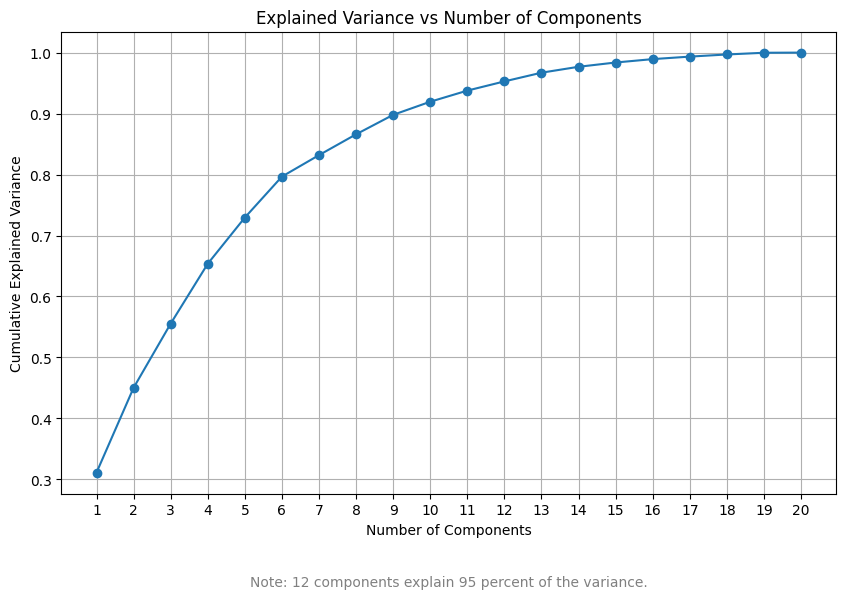

In [487]:
# perform PCA on the X dataset to identify the number of components that explain the variance
pca = PCA()
pca.fit(X)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.title('Explained Variance vs Number of Components')

# Set x-axis ticks to show only whole numbers
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))

plt.annotate("Note: 12 components explain 95 percent of the variance.", 
             xy=(0.5, -0.2), xycoords='axes fraction', ha='center', fontsize=10, color='gray')
plt.show()

In [488]:
# Find number of components to reach 95% explained variance
cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cum_var >= 0.95) + 1
print(f"Number of components to explain 95% variance: {n_components}")

Number of components to explain 95% variance: 12


Perform PCA to reduce the dataset to 12 components

In [489]:
# perform PCA on the dataset to reduce it to 12 components
num_of_components = 12

pca = PCA(n_components=num_of_components)  # initialize PCA with 12 components
# fit and transform the dataset to ensure each attribute gets equal importance
pca_dataset = pca.fit_transform(X)
X = pd.DataFrame(pca_dataset, columns=[f'PC{i+1}' for i in range(num_of_components)])  # dynamically name components

X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-2.844258,0.509399,0.187400,-0.723184,0.495248,0.203471,-0.365311,-0.549478,0.142284,-0.420170,0.084987,0.476893
1,-0.777343,0.906046,0.646146,-0.409810,1.229511,-0.430060,0.298767,0.947190,0.670123,0.750401,-0.771775,-0.404896
2,-0.902732,-0.222746,-1.282359,-0.393783,0.826410,1.481325,0.258222,-0.952663,-1.442551,-0.287320,-0.287300,0.210737
3,0.578858,0.533997,-0.657194,0.755012,1.009824,0.786183,0.480131,0.312162,0.383498,-0.083121,-0.370146,-0.825464
4,0.061937,0.022326,-0.656758,-1.283642,0.768383,0.002545,0.786039,-0.131184,0.413453,0.869916,0.245187,0.105243
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-1.069484,0.014631,-0.740349,1.325591,-0.089739,0.701904,-0.692916,-0.052822,0.194746,0.042965,-0.362792,0.662720
914,2.093822,0.782404,2.156275,0.892690,-0.814529,-0.244557,0.134358,-0.380695,0.843380,0.151933,-0.487523,0.950213
915,1.140686,-0.185613,-0.770916,0.657834,0.585713,-0.040976,0.460404,0.603994,0.502505,-0.218545,0.300173,-0.044720
916,-1.280560,0.384997,-0.002639,-0.642157,-0.654590,-0.572964,0.289481,1.429633,-0.035638,-0.656392,-0.850636,-0.080270


---

## Train-Test Split

Seperate the features (X) and the target (y)

In [490]:
# 80% of the data will be training and 20% of the data will be testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [491]:
X_train.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
795,-2.494620,-0.606582,2.261843,0.424520,-0.868543,0.474600,-0.675340,-0.061069,0.409596,0.781484,0.172750,0.326381
25,-3.086174,-0.204335,0.299719,-0.237837,0.502655,-0.296233,-0.225337,-0.105421,0.174569,0.713361,0.365787,-0.028863
84,1.214889,-0.081724,1.433737,-0.291786,0.215223,1.256161,0.343472,0.487955,0.637805,-0.187666,0.376319,-0.095843
10,-2.184881,-0.357050,-0.385400,-0.280230,0.717143,0.303460,-0.070255,-0.449510,0.110557,0.861842,-0.356494,-0.761914
344,1.202989,-2.768362,0.460890,0.129433,0.418660,0.909496,0.402531,0.424484,0.507878,-0.073925,-0.369995,0.194745


In [492]:
X_test.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
668,-0.984812,0.368827,0.135514,-1.497984,-0.765319,-1.614497,-0.290992,-0.140751,0.601034,-0.733255,-0.406979,-0.455531
30,-0.574474,1.967319,-0.930617,-1.095585,-0.538167,1.804005,0.100717,0.868305,0.537578,0.824463,0.039088,0.425989
377,2.678833,-0.965377,1.832629,-0.774709,0.563149,-0.616381,-0.453716,0.141818,-0.593317,-0.161096,-0.545046,0.273137
535,1.025623,-0.948829,-0.399805,0.686042,1.004451,-0.832124,0.457593,0.942609,-0.255949,-0.267816,0.225483,-0.106725
807,-1.642298,-0.070200,-0.932733,-0.300775,-1.315614,0.093790,0.806134,-0.012526,0.382231,-0.554672,0.188032,0.363191


In [493]:
y_train.head(5)

795    0
25     0
84     1
10     0
344    1
Name: HeartDisease, dtype: int64

In [494]:
y_test.head(5)

668    0
30     1
377    1
535    1
807    0
Name: HeartDisease, dtype: int64

---

## Machine Learning 

Method to evaluate models

In [495]:
def evaluate_model(model, isDeepModel):
    # predict the test set
    if isDeepModel:
        # predict probabilities for the test set
        y_pred_probs = model.predict(X_test).flatten()
        # convert probabilities to binary predictions using a threshold of 0.5
        y_prediction = np.where(y_pred_probs > 0.5, 1, 0)
    else:
        y_prediction = model.predict(X_test)

    # Accuracy: How many predictions where correct overall
    accuracy = accuracy_score(y_test, y_prediction)
    print(f"Accuracy (percentage): {(accuracy*100):.4f}")

    # Confusion Matrix: Shows breakdown of: true positives, true negatives, false positives, false negatives
    conf_matrix = confusion_matrix(y_test, y_prediction)
    print("\nConfusion Matrix:")
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Recall: Out of all the actual positive cases, how many did the model successfully identify?
    recall = recall_score(y_test, y_prediction)
    recall_percentage = (recall) * 100
    print(f"\nRecall (percentage): {(recall*100):.4f}")

    # Precision: Out of all the predictions the model made as positive, how many were actually correct?
    precision = precision_score(y_test, y_prediction)
    precision_percentage = (precision) * 100
    print(f"\nPrecision (percentage): {(precision*100):.4f}")

### K-Nearest Neighbors (KNN) Model

Find the best value for K

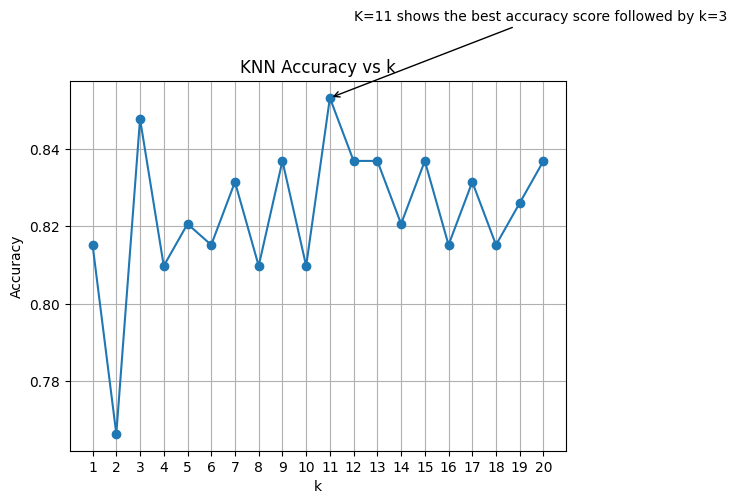

In [496]:
k_values = list(range(1, 21))
accuracies = []

# train KNN model for all k values (1-20)
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# plot every accuracy score against there K value
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy vs k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.annotate("K=11 shows the best accuracy score followed by k=3", 
             xy=(11, accuracies[10]), xytext=(12, accuracies[10] + 0.02),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.show()

Train KNN

In [497]:
# initialize model with k=11 (found to have best accuracy score from above)
knn = KNeighborsClassifier(n_neighbors=11)
# train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

Accuracy (percentage): 85.3261

Confusion Matrix:


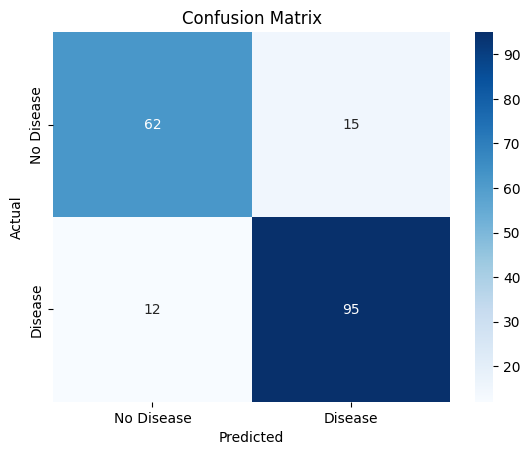


Recall (percentage): 88.7850

Precision (percentage): 86.3636


In [498]:
evaluate_model(knn, False)

### Naive Bayes Model

Train Naive Bayes

In [499]:
# initialize the model
nb_model = GaussianNB()
# train the model
nb_model.fit(X_train, y_train)

GaussianNB()

Accuracy (percentage): 84.2391

Confusion Matrix:


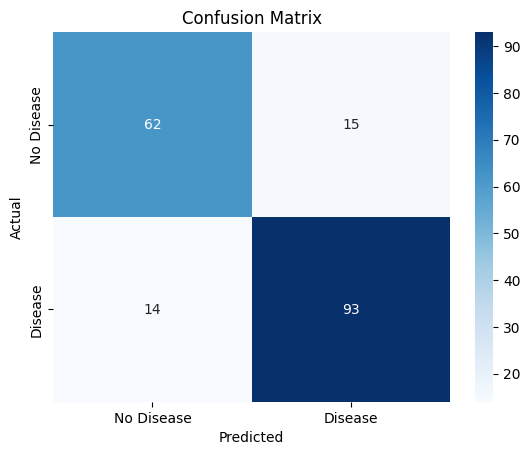


Recall (percentage): 86.9159

Precision (percentage): 86.1111


In [500]:
# evaluate the model
evaluate_model(nb_model, False)

### Random Forest Model

Train Random Forest

In [501]:
# initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# train model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy (percentage): 84.2391

Confusion Matrix:


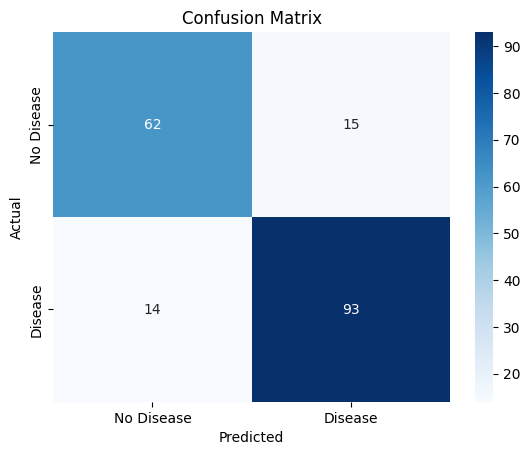


Recall (percentage): 86.9159

Precision (percentage): 86.1111


In [502]:
# evaluate the model

evaluate_model(rf_model, False)

### Decision Tree Model

In [503]:
# initialize mode
dt_model = DecisionTreeClassifier(random_state=42)
# train model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy (percentage): 75.5435

Confusion Matrix:


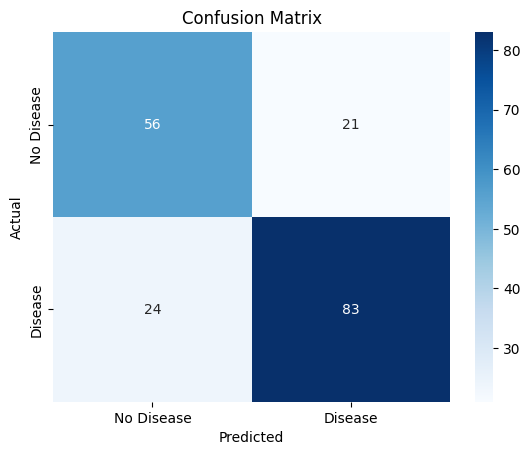


Recall (percentage): 77.5701

Precision (percentage): 79.8077


In [504]:
# evaluate the model

evaluate_model(dt_model, False)

### Support Vector Machine (SVM) Model

In [505]:
# initialize model
svm_model = SVC(kernel='rbf', random_state=42)
# train model
svm_model.fit(X_train, y_train)

SVC(random_state=42)

Accuracy (percentage): 84.7826

Confusion Matrix:


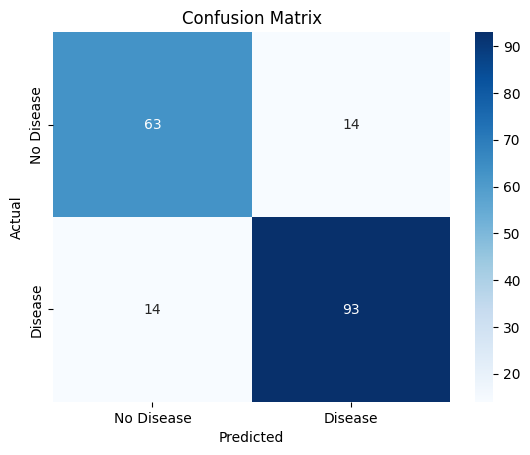


Recall (percentage): 86.9159

Precision (percentage): 86.9159


In [506]:
# evaluate the model

evaluate_model(svm_model, False)

### Deep Learning Model: Multilayer Perceptron (MLP)

Define and train the model

In [507]:
# define the model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # Input layer with 64 neurons and ReLU activation
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation for binary classification
])

# compile the model
model.compile(
    optimizer='adam',  # Use Adam optimizer for adaptive learning rate
    loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
    metrics=['accuracy']  # Track accuracy as a performance metric
)

# train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=50,  # Number of epochs to train
    batch_size=16,  # Number of samples per batch
    validation_split=0.1,  # Use 10% of the training data for validation
    verbose=1  # Display training progress
)

Epoch 1/50


c:\Users\Abdelrahman Maher\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6090 - loss: 0.6255 - val_accuracy: 0.8243 - val_loss: 0.5184
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8472 - loss: 0.4526 - val_accuracy: 0.7973 - val_loss: 0.4480
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8742 - loss: 0.3591 - val_accuracy: 0.8514 - val_loss: 0.4373
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8714 - loss: 0.3323 - val_accuracy: 0.8378 - val_loss: 0.4658
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8721 - loss: 0.3333 - val_accuracy: 0.7973 - val_loss: 0.4518
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8999 - loss: 0.2745 - val_accuracy: 0.8108 - val_loss: 0.4800
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9124 - loss: 0.2330 - val_accuracy: 0.7973 - val_loss: 0.4954
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8728 - loss: 0.3143 - val_accuracy: 0.7973 - val_loss: 0.5103
Epo

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Accuracy (percentage): 82.0652

Confusion Matrix:


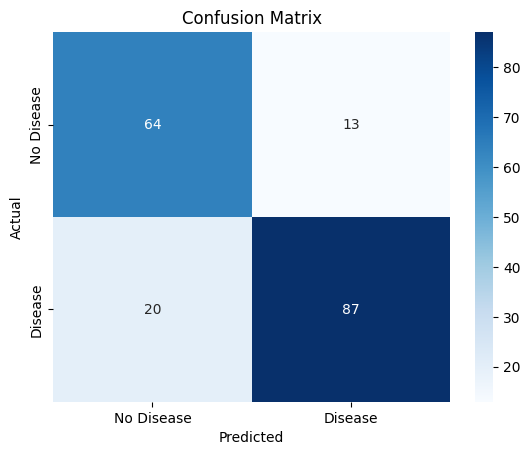


Recall (percentage): 81.3084

Precision (percentage): 87.0000


In [508]:
# evaluate the model

evaluate_model(model, True)

---

## Model Evaluations

Method to compare models

In [509]:
results = []

# function to evaluate models and store results
def compare_models(name, model, isDeepModel):
    if isDeepModel:
        # predict probabilities for the test set
        y_pred_probs = model.predict(X_test).flatten()
        # convert probabilities to binary predictions using a threshold of 0.5
        y_pred = np.where(y_pred_probs > 0.5, 1, 0)
    else:
        y_pred = model.predict(X_test)

    results.append({
        'Model': name,
        'Accuracy': round(accuracy_score(y_test, y_pred), 6) * 100,
        'Recall': round(recall_score(y_test, y_pred), 6) * 100,
        'Precision': round(precision_score(y_test, y_pred), 6) * 100
    })

In [510]:
# Compare all models
compare_models("KNN", knn, False)
compare_models("Naive Bayes", nb_model, False)
compare_models("Decision Tree", dt_model, False)
compare_models("Random Forest", rf_model, False)
compare_models("SVM", svm_model, False)
compare_models("MLP", model, True)

metrics_df = pd.DataFrame(results)
metrics_df

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


,Model,Accuracy,Recall,Precision
0,KNN,85.3261,88.7850,86.3636
1,Naive Bayes,84.2391,86.9159,86.1111
2,Decision Tree,75.5435,77.5701,79.8077
3,Random Forest,84.2391,86.9159,86.1111
4,SVM,84.7826,86.9159,86.9159
5,MLP,82.0652,81.3084,87.0000
